# Outliers

## Machime learning algorithms and Outliers

### Outliers

    An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error.


Various Machine Learning Algorithms and how much they are sensitive to outliers

- Naive Bayes Clsasifier -----------------> Not sensitive to outlers
- SVM ------------------------------------> Not sensitive to Outliers
- Decision Tree Regressor/Classifier -----> Not Sensitive To Outliers
- Ensemble Technique(RF, XGBOOST, GB) ----> Not Sensitive To Outlers
- KNN  -----------------------------------> Not Sensitive To Outliers

- Linear Regression ----------------------> Sensitive To Outliers
- Logistic Regression --------------------> Sensitive To Outliers
- K-Means --------------------------------> Sensitive To Outliers ( euclidien distance and clusters are based on the outliers also)
- Hierarchal -----------------------------> Sensitive To Outliers 
- PCA ------------------------------------> Sensitive To Outliers (More outliers then the whole variance is not getting captured)
- DBSCAN ---------------------------------> Sensitive To Outliers 
- Neural Networks ------------------------>  Sensitive To Outliers

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Dixit01/Data_analysis/main/data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.Age.isnull().sum()

177

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


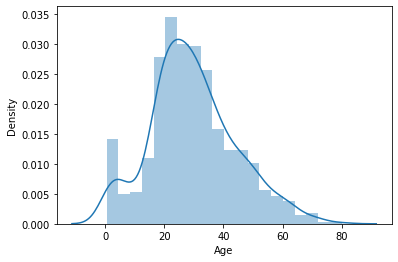

In [7]:
sns.distplot(df.Age.dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


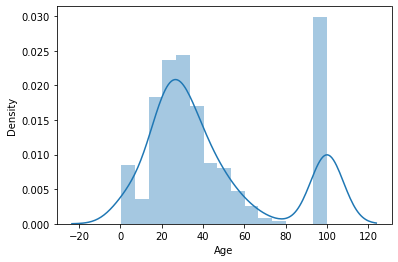

In [10]:
sns.distplot(df.Age.fillna(100))

### Gaussian Distribution

Text(0, 0.5, 'No of passengers')

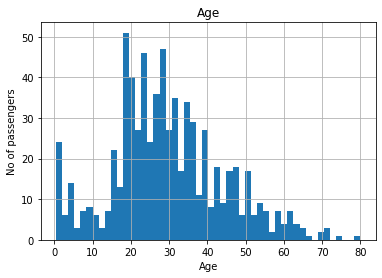

In [12]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

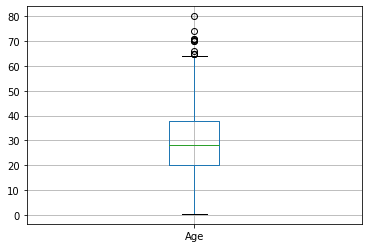

In [14]:
figure = df.boxplot(column='Age')

In [21]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### If the Data is Normally Distributed we use this

In [22]:
#### Assuming age follows a gaurssian distribution we will calculate the boudaries which differentiate the outliers
upper_boundary = df.Age.mean() + 3 * df.Age.std()
lower_boundary = df.Age.mean() - 3 * df.Age.std()

In [23]:
print(upper_boundary)
print(lower_boundary)
print(df.Age.mean())

73.27860964406094
-13.880374349943303
29.69911764705882


### feature is skewed

Text(0, 0.5, 'No of passengers')

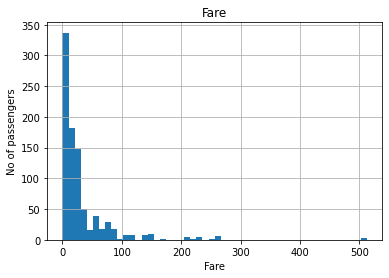

In [25]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


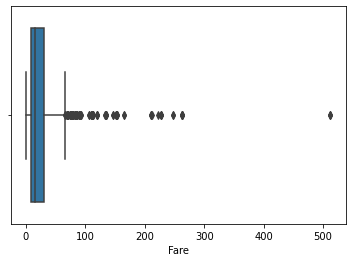

In [26]:
sns.boxplot('Fare', data=df)

In [29]:
df['Fare'] = df.Fare.fillna(df.Fare.median())

In [30]:
df.Fare.isnull().sum()

0

In [31]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
### Let's compute the interquantile range to calculate the boundries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [33]:
lower_bridge = df.Fare.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.Fare.quantile(0.75) + (IQR * 1.5)

In [34]:
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [36]:
## Extreme outlier
lower_bridge = df.Fare.quantile(0.25) - (IQR * 3)
upper_bridge = df.Fare.quantile(0.75) + (IQR * 3)

In [37]:
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [38]:
data = df.copy()

In [48]:
data.loc[df['Age'] >= 73, 'Age'] = 73

In [49]:
data.loc[df['Fare'] >= 100, 'Fare'] = 100

Text(0, 0.5, 'No of passengers')

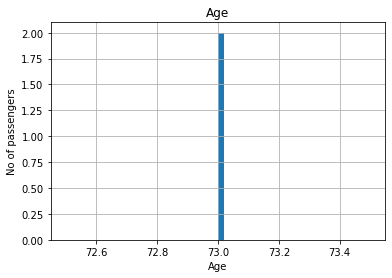

In [41]:
figure = data.age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

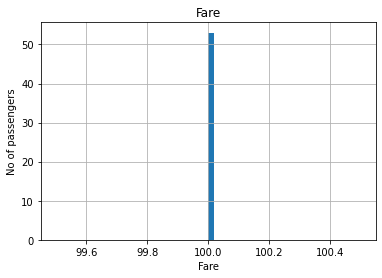

In [42]:
figure = data.fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

In [43]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'], test_size=0.3)

In [51]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print(pred)
y_pred = clf.predict_proba(X_test)
# print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

print("Confusion matrix: {}".format(confusion_matrix(y_test, pred)))
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_test, y_pred[:, 1])))

Confusion matrix: [[151  19]
 [ 65  33]]
Accuracy Score: 0.6865671641791045
Roc_Auc_Score: 0.7040216086434574


In [52]:
### Logistic Regression
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print(pred)
y_pred = clf.predict_proba(X_test)
# print(y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

print("Confusion matrix: {}".format(confusion_matrix(y_test, pred)))
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_test, y_pred[:, 1])))

Confusion matrix: [[132  38]
 [ 45  53]]
Accuracy Score: 0.6902985074626866
Roc_Auc_Score: 0.7140756302521009
